In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report





# import seaborn as sbn
# import timeit



from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\trave\AppData\Local\Temp\ipykernel_10760\1589071740.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dataset

Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Portugal, January 2018I

# First dataset representation

In [2]:
path="datasets/dataframe_benign_portscan.csv"
df = pd.read_csv(path)
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,1,113.152941,64.975610,158.045455,1328,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,1,113.152941,64.975610,158.045455,1328,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,1,0.000000,0.000000,0.000000,32,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,1,112.795181,66.536585,157.952381,1328,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,2,0.000000,0.000000,0.000000,32,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,22,244,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,8196.721311,244.00000,0.000000,244,244,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,32,32,4098.360656,4098.360656,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,1,0.000000,0.000000,0.000000,32,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,22,1307239,41,40,2728,6634,456,0,66.536585,110.129945,976,0,165.850000,325.142379,7161.659039,61.962656,16340.48750,107311.878700,956263,0,1307239,32680.975,159066.9939,997887,1,350863,8996.487179,20369.77643,87521,1,0,1328,1296,31.363813,30.598842,0,976,114.170732,243.964772,59518.81000,0,0,0,1,0,0,0,0,115.580247,66.536585,165.850000,1328,41,2728,40,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,60058,82,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,36585.365850,41.00000,11.313709,49,33,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,32,64,12195.121950,24390.243900,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,2,0.000000,0.000000,0.000000,32,1,0,2,0,243,290,0,32,0.0

# Dataset characteristics

In [3]:
df.columns = [col.lstrip() for col in df.columns] # delete a space before name of the columns
df.columns # prints all the columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count'

## Number of rows and columns

In [8]:
df.shape

(286096, 69)

## Descriptive statistics

In [9]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05
mean,8015.814957,5.386306e+06,3.476305,3.523953,233.703330,2.710754e+03,81.132277,10.360362,24.164366,24.622107,185.887101,27.510668,76.568685,55.814592,1.117593e+06,6.236320e+04,3.440116e+05,6.698980e+05,1.823650e+06,1.153528e+04,5.262043e+06,7.801051e+05,5.093240e+05,1.775746e+06,4.489433e+05,4.974906e+06,7.982842e+05,3.967066e+05,1.571719e+06,5.060200e+05,0.020968,91.943879,87.239150,4.146297e+04,2.113554e+04,10.135947,207.042874,47.919902,61.832647,3.561838e+04,0.008088,0.020968,0.000073,0.661110,0.123445,0.044719,0.000073,0.850617,55.221141,24.164366,76.568685,91.943879,3.476305,233.703330,3.523953,2.710754e+03,11150.420831,1146.227102,1.730720,29.080511,3.413634e+04,2.297963e+04,7.795819e+04,2.174195e+04,1.605051e+06,6.128327e+04,1.649324e+06,1.538278e+06
std,15346.254906,2.193700e+07,19.527596,28.307086,1866.714695,5.101078e+04,327.968919,24.252211,78.429008,117.290777,586.063169,54.237347,204.267870,196.760988,2.568310e+07,1.921187e+05,2.126341e+06,3.832840e+06,9.039912e+06,3.802998e+05,2.181016e+07,5.983210e+06,2.577312e+06,9.025005e+06,5.780141e+06,2.126673e+07,6.246715e+06,2.373165e+06,8.718060e+06,6.046578e+06,0.143279,503.881172,698.686067,1.602280e+05,6.249840e+04,18.778166,636.985751,122.100317,178.312136,1.632023e+05,0.089570,0.143279,0.008567,0.473333,0.328947,0.206687,0.008567,0.450324,129.866212,78.429008,204.267870,503.881172,19.527596,1866.714695,28.307086,5.101078e+04,14275.057102,6627.821754,14.906899,8.013593,4.662323e+05,2.624737e+05,7.347312e+05,4.225875e+05,8.687769e+06,1.217802e+06,8.888287e+06,8.566916e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.930000e+08,-2.000000e+06,-1.300000e+01,0.000000e+00,-1.300000e+01,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,

## Display general information about the data frame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286096 entries, 0 to 286095
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             286096 non-null  int64  
 1   Flow Duration                286096 non-null  int64  
 2   Total Fwd Packets            286096 non-null  int64  
 3   Total Backward Packets       286096 non-null  int64  
 4   Total Length of Fwd Packets  286096 non-null  int64  
 5   Total Length of Bwd Packets  286096 non-null  int64  
 6   Fwd Packet Length Max        286096 non-null  int64  
 7   Fwd Packet Length Min        286096 non-null  int64  
 8   Fwd Packet Length Mean       286096 non-null  float64
 9   Fwd Packet Length Std        286096 non-null  float64
 10  Bwd Packet Length Max        286096 non-null  int64  
 11  Bwd Packet Length Min        286096 non-null  int64  
 12  Bwd Packet Length Mean       286096 non-null  float64
 13 

# Data preprossesing

## Stosunek BENIGN do PortScan

In [11]:
df.value_counts("Label")

Label
PortScan    158804
BENIGN      127292
Name: count, dtype: int64

Sprawdzenie istnienia pustych pól

In [5]:
df.isnull().sum()
#df= df.dropna()
#df1 = df.drop_duplicates()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

Zamiana wartości kolumny Label

PortScan -> 1
BENIGN -> 0

In [4]:
df['Label'] = np.where(df['Label']=='PortScan', 1, 0)

df.value_counts("Label")

Label
1    158804
0    127292
Name: count, dtype: int64

In [14]:
columns_with_all_zeros = df.eq(0).all()

# Wyświetl kolumny, które składają się z samych zer
print(columns_with_all_zeros[columns_with_all_zeros])

# Wyświetl nazwy kolumn, które składają się z samych zer
print(columns_with_all_zeros[columns_with_all_zeros].index)

Series([], dtype: bool)
Index([], dtype='object')


# Odfiltrowanie kolumn

Korelacja prosta

In [16]:
# import pandas as pd

# # Załóżmy, że masz DataFrame o nazwie 'df'
# # Jeśli dane są w innym formacie, dostosuj ten fragment kodu
# # df = pd.read_csv("twoj_plik.csv")

# # Usuń kolumny, które nie są numeryczne (jeśli istnieją)
# numerical_columns = df.columns
# df_numeric = df[numerical_columns]

# # Iteruj przez każdą kolumnę i oblicz korelację z kolumną 'Label'
# correlations = {}
# for column in df_numeric.columns:
#     correlation = df[column].corr(df['Label'])
#     correlations[column] = correlation

# # Wyświetl korelacje dla każdej kolumny
# for column, correlation in correlations.items():
#     print(f"Korelacja dla {column}: {correlation}")


# Usuń kolumny, które nie są numeryczne (jeśli istnieją)
numerical_columns = df.columns
df_numeric = df[numerical_columns]
n=0
# Iteruj przez każdą kolumnę i oblicz korelację z kolumną 'Label'
correlations = {}
for column in df_numeric.columns:
    correlation = df[column].corr(df['Label'])
    correlations[column] = correlation

# Wyświetl korelacje tylko dla kolumn z wartością bezwzględną większą niż 0.2
for column, correlation in correlations.items():
    if abs(correlation) > 0.2:
        n+=1
        print(column)
print(n)

Flow Duration
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow IAT Max
Fwd IAT Total
Fwd IAT Std
Fwd IAT Max
Bwd IAT Total
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
PSH Flag Count
ACK Flag Count
URG Flag Count
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Init_Win_bytes_forward
min_seg_size_forward
Label
29


Korelacja z macierzą

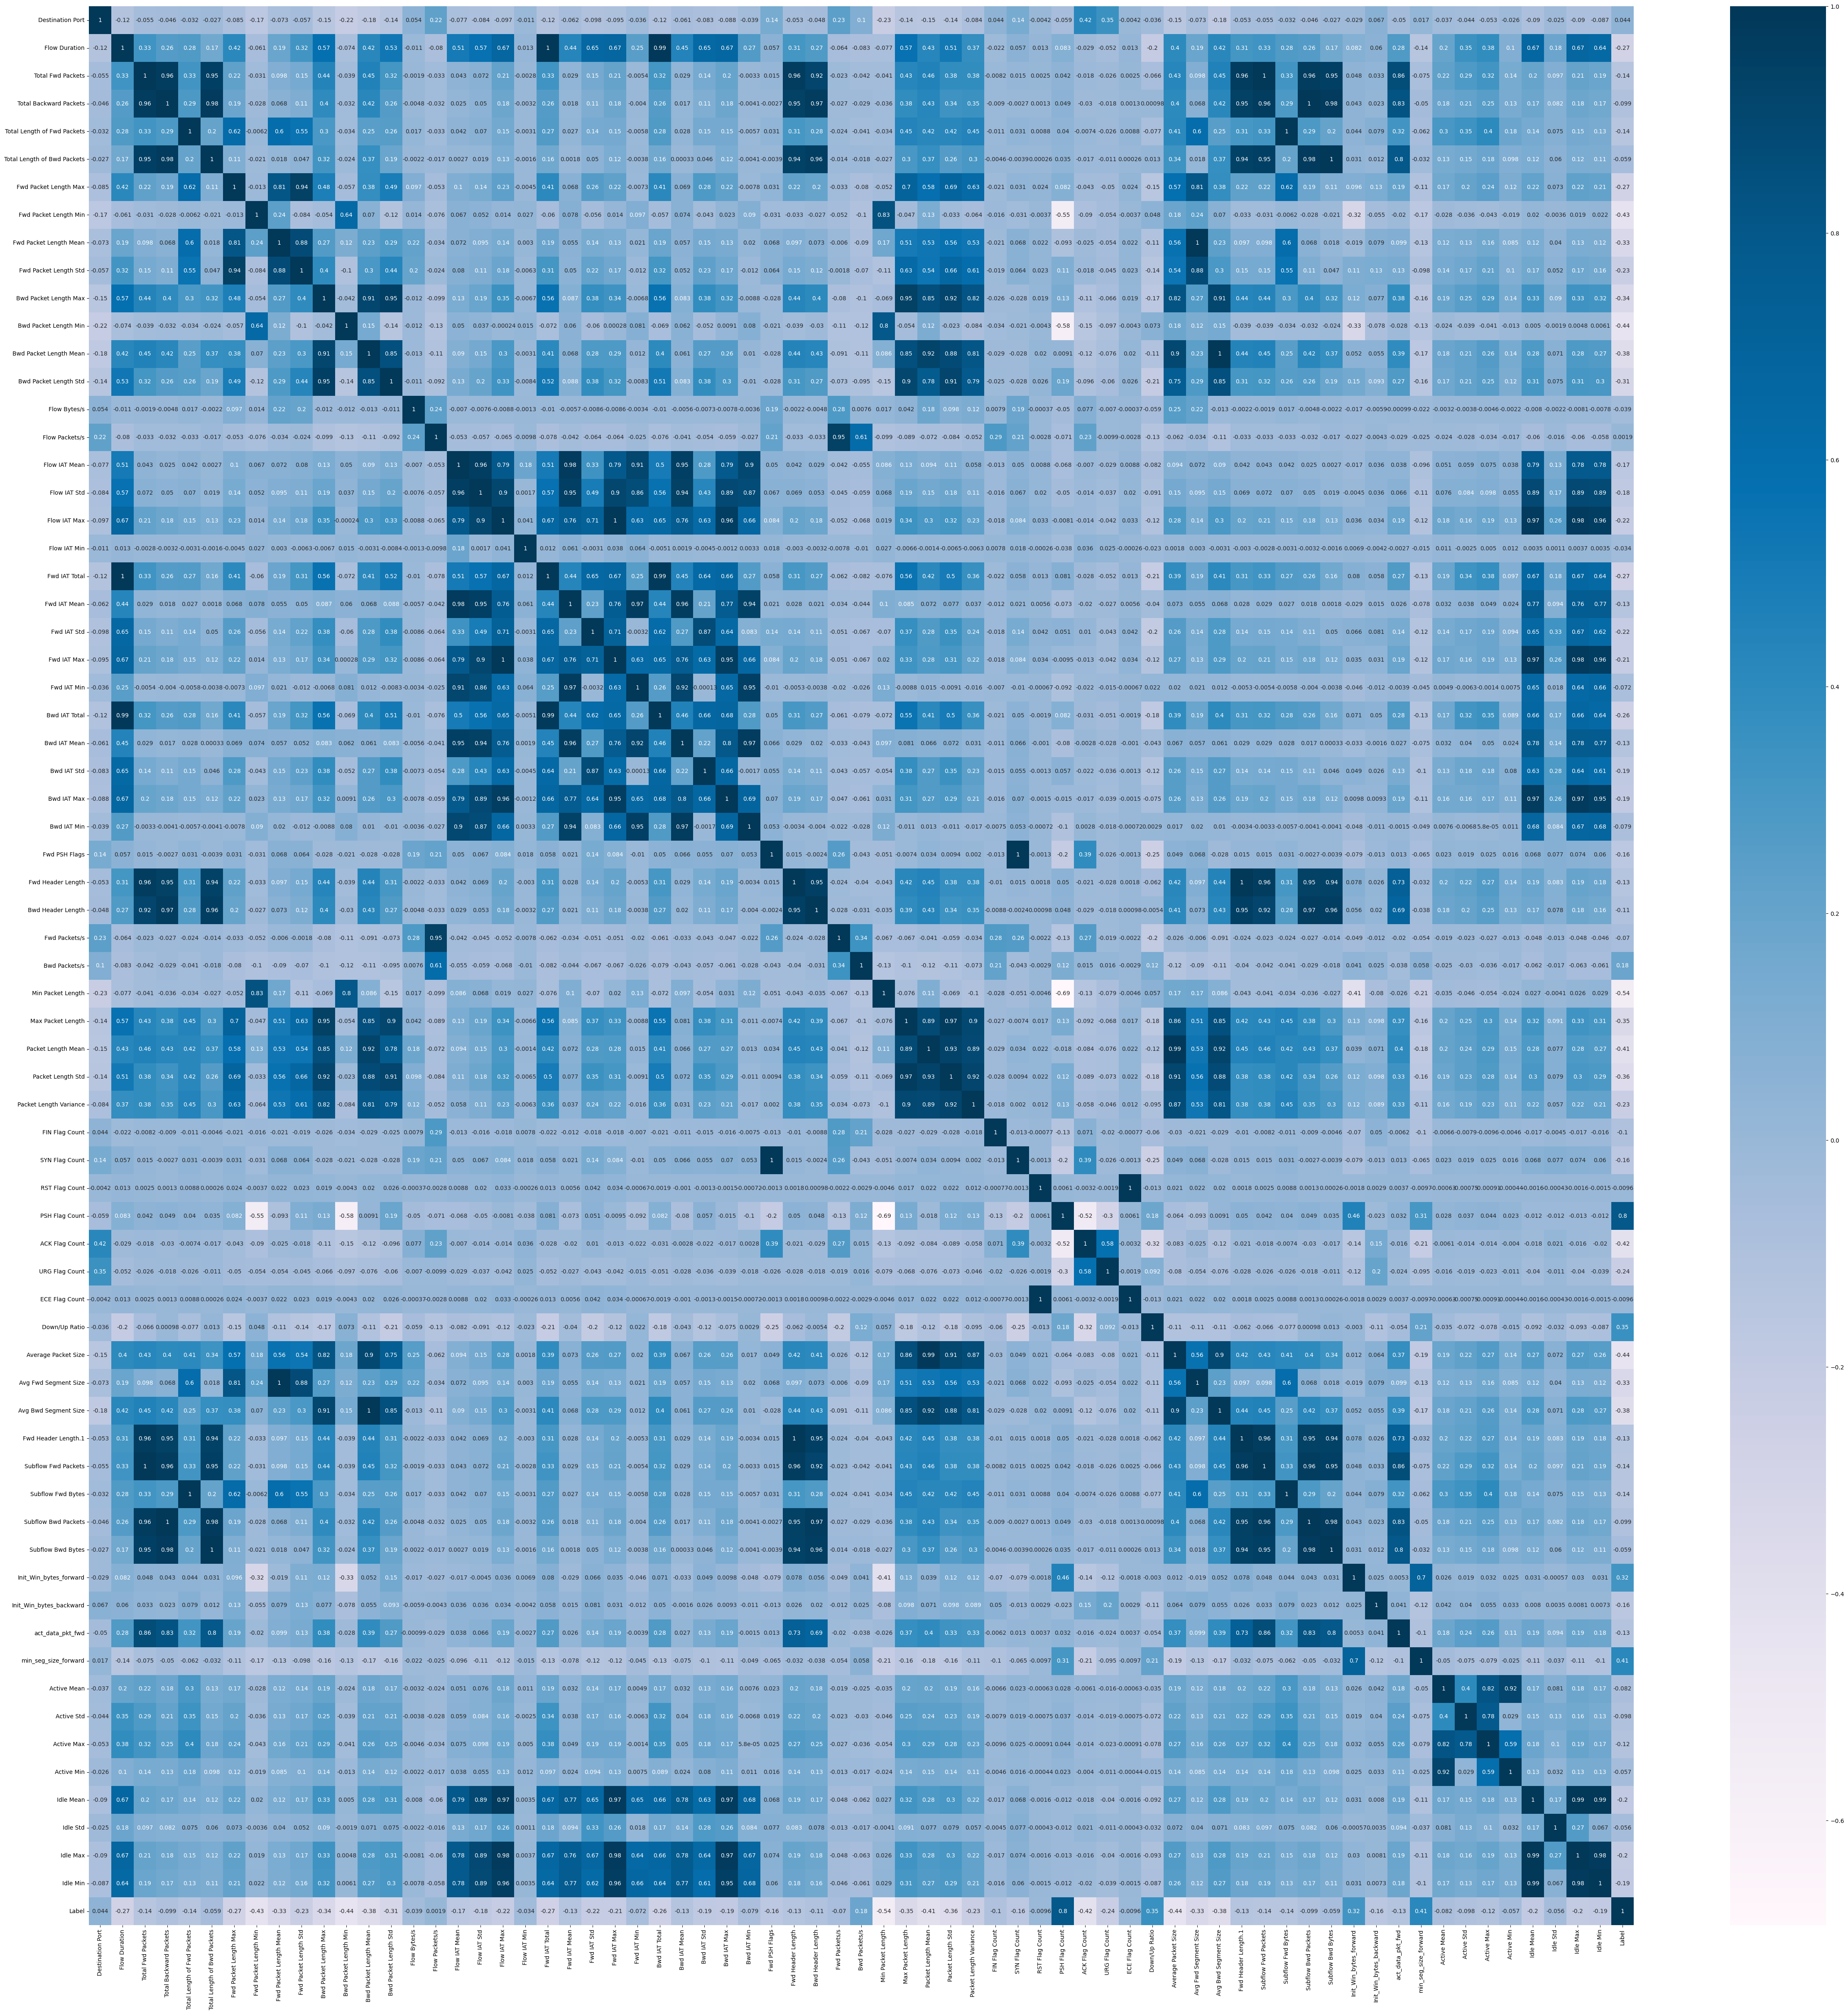

In [9]:
plt.figure(figsize=(60,60))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [13]:
cor_target = abs(cor["Label"]) # absolute value of the correlation

relevant_features = cor_target[cor_target>0.2] # highly correlated features

names = [index for index, value in relevant_features.items()] # getting the names of the features

names.remove('Label') # removing target feature

print(names) # printing the features
print(len(names))

['Flow Duration', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Total', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Init_Win_bytes_forward', 'min_seg_size_forward']
28


29


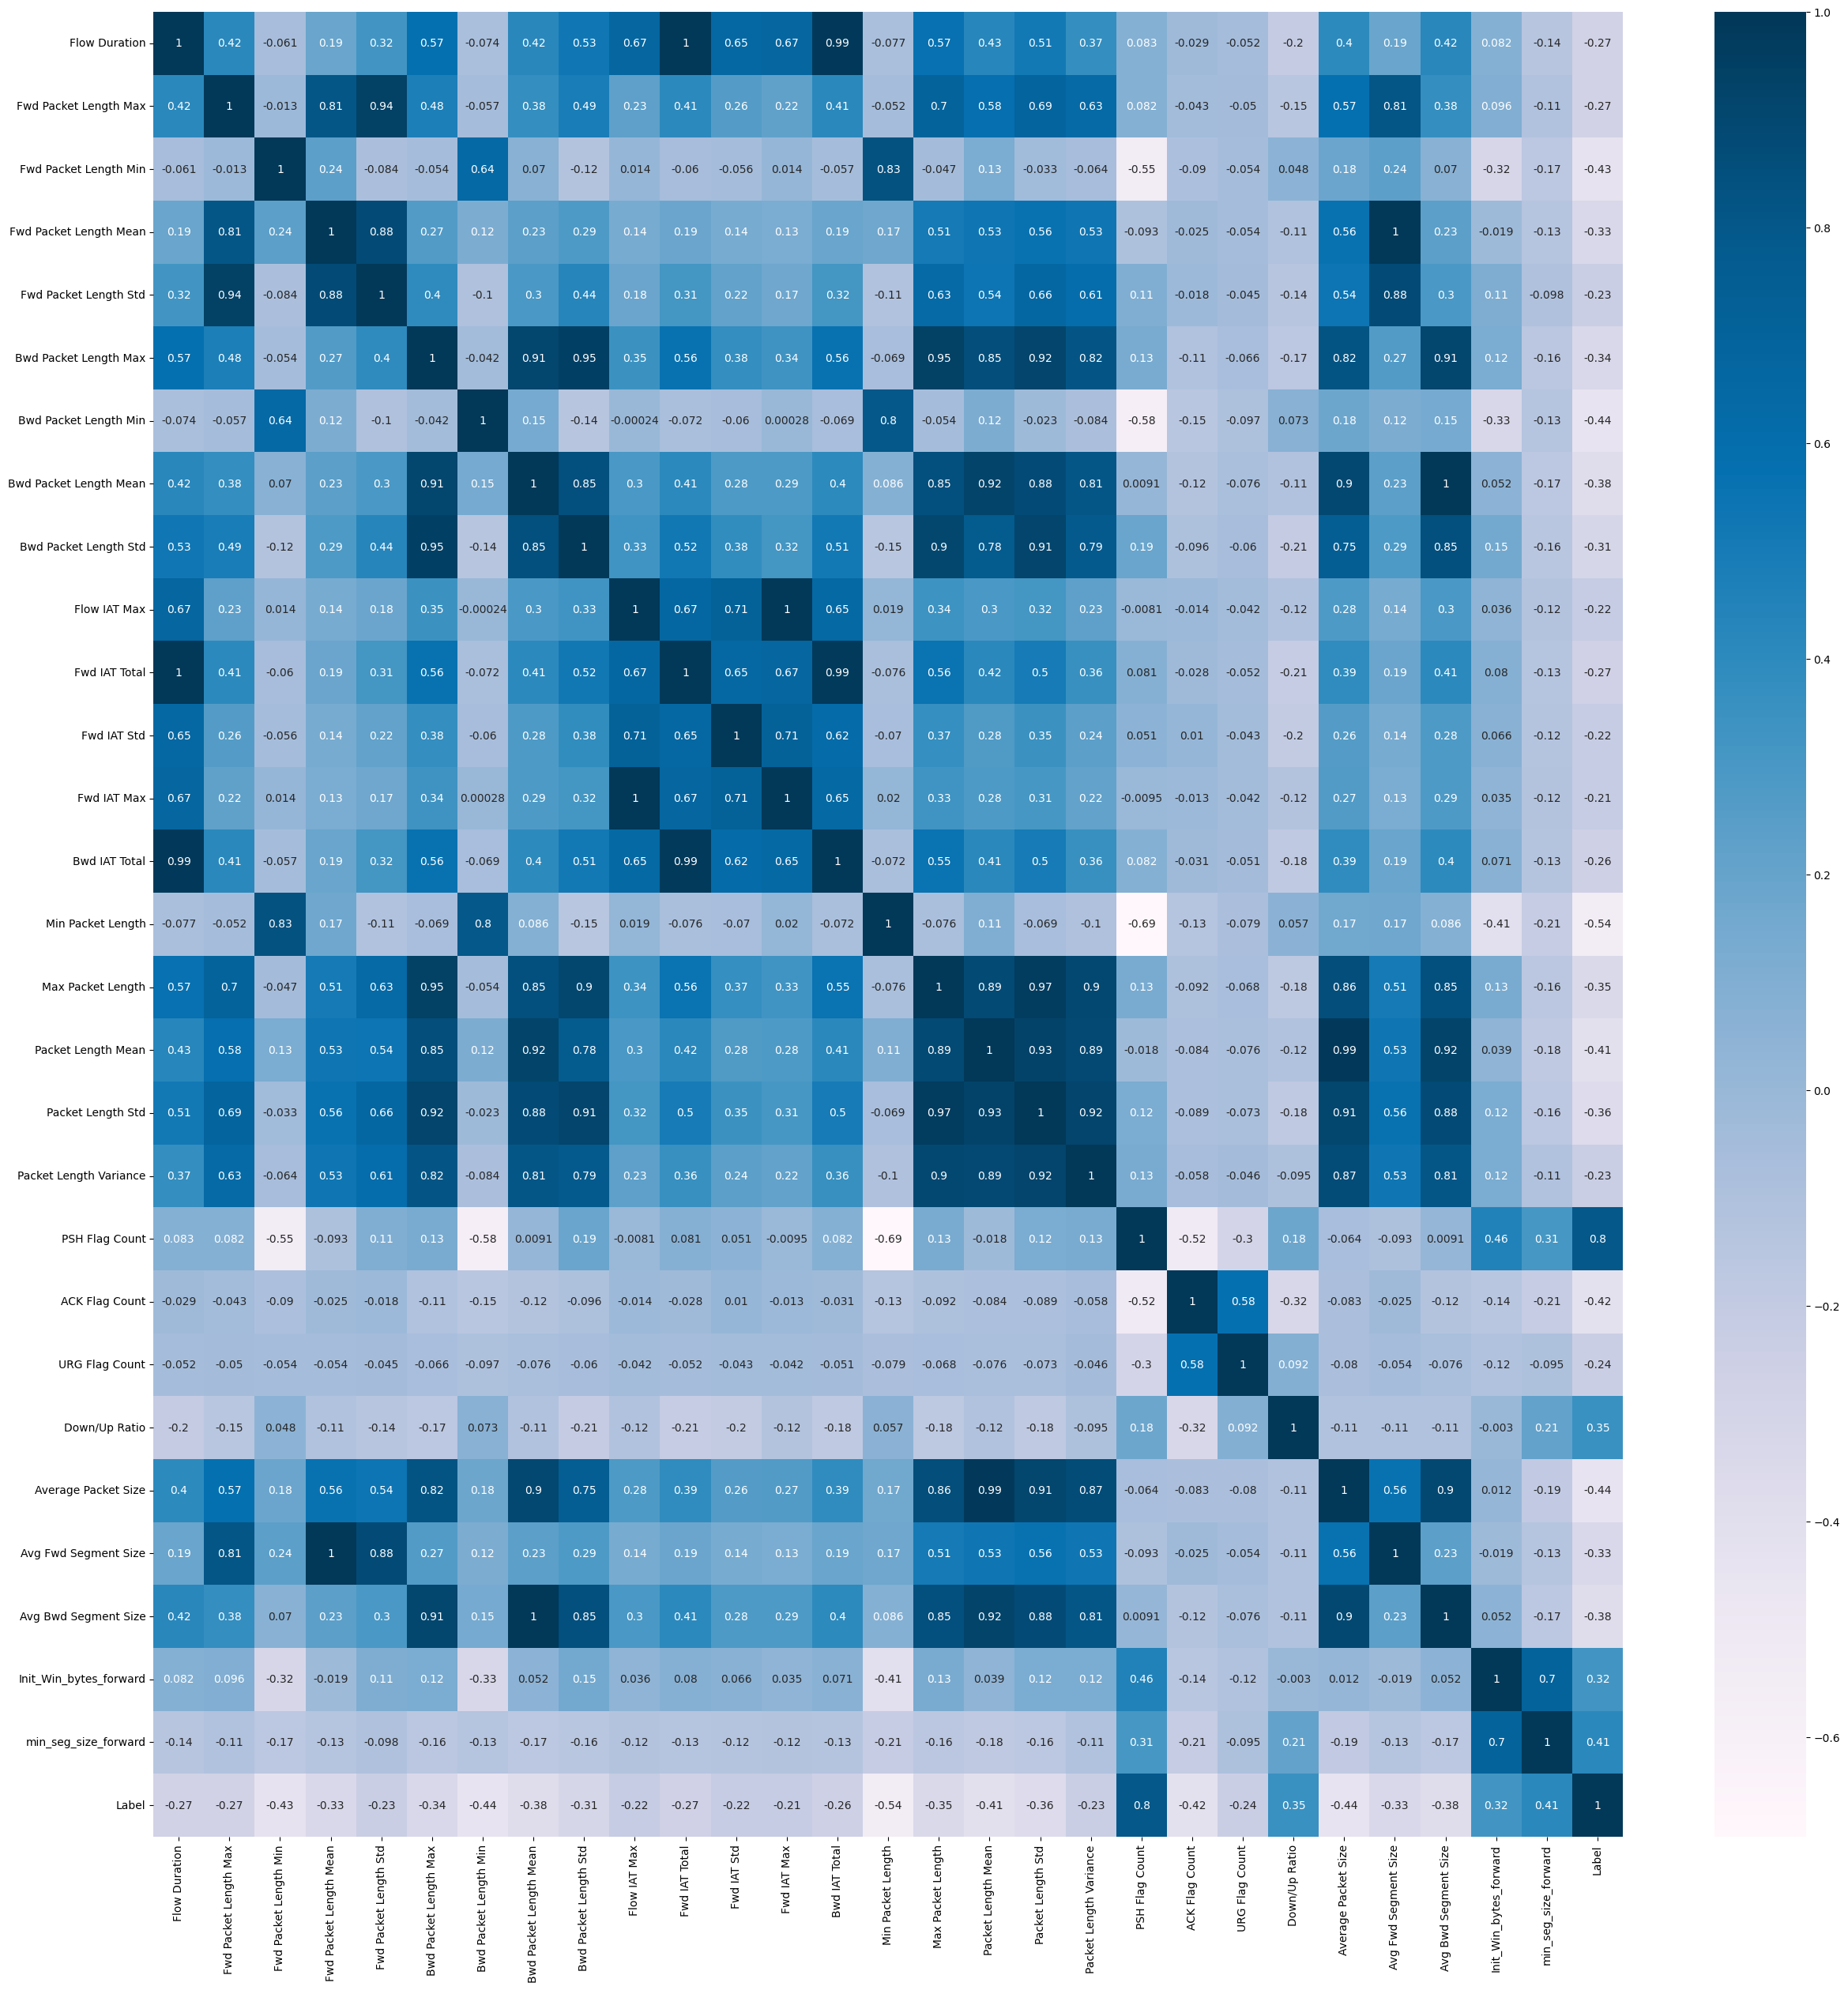

In [21]:
df_filtered = df[names + ['Label']]
print(len(df_filtered.columns))
plt.figure(figsize=(30,30))
cor = df_filtered.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

# Podzial na treningowy i testowy zbiór

In [22]:
# Выбрасываем столбец 'Label', axis=1 указывает, что мы выбрасываем столбец, а не строку
# X - это матрица признаков которых 0-68
x = df_filtered.drop(['Label'], axis=1)

# Y это значения label для каждого Label
y = df_filtered['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

under_sampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = under_sampler.fit_resample(x_train, y_train)

# Проверяем, что количество значений в классах сбалансировано
print(y_resampled.value_counts())




Label
0    89078
1    89078
Name: count, dtype: int64


KNN model

In [25]:
# Inicjalizacja modelu KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Uczenie modelu
knn_model.fit(x_resampled, y_resampled)

# Przewidywanie etykiet dla danych testowych
y_pred = knn_model.predict(x_test)

# Расчет точности и вывод отчета по классификации
accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Точность: 0.9995339570541425
Отчет по классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38214
           1       1.00      1.00      1.00     47615

    accuracy                           1.00     85829
   macro avg       1.00      1.00      1.00     85829
weighted avg       1.00      1.00      1.00     85829

[[38193    21]
 [   19 47596]]


LogisticRegression

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_resampled)
X_test_scaled = scaler.transform(x_test)

# Inicjalizacja modelu LogisticRegression
regr_model = LogisticRegression(max_iter=30000)

# Uczenie modelu
regr_model.fit(x_resampled, y_resampled)

# Przewidywanie etykiet dla danych testowych
y_pred = regr_model.predict(x_test)

# Расчет точности и вывод отчета по классификации
accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точность: 0.9642428549790864
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96     38214
           1       0.94      1.00      0.97     47615

    accuracy                           0.96     85829
   macro avg       0.97      0.96      0.96     85829
weighted avg       0.97      0.96      0.96     85829

[[35338  2876]
 [  193 47422]]


d:\Magisterka\Semestr_2\AI_proj\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree model

In [24]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_resampled, y_resampled)

y_pred = tree_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точность: 0.9998368849689498
Отчет по классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38214
           1       1.00      1.00      1.00     47615

    accuracy                           1.00     85829
   macro avg       1.00      1.00      1.00     85829
weighted avg       1.00      1.00      1.00     85829

[[38207     7]
 [    7 47608]]


GradientBoostingClassifier

In [27]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_resampled, y_resampled)

y_pred = gb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точность: 0.9998368849689498
Отчет по классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38214
           1       1.00      1.00      1.00     47615

    accuracy                           1.00     85829
   macro avg       1.00      1.00      1.00     85829
weighted avg       1.00      1.00      1.00     85829

[[38210     4]
 [   10 47605]]


GaussianNB model

In [23]:
gaus_model = GaussianNB()
gaus_model.fit(x_resampled, y_resampled)

y_pred = gaus_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точность: 0.659159491547146
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.99      0.24      0.38     38214
           1       0.62      1.00      0.76     47615

    accuracy                           0.66     85829
   macro avg       0.80      0.62      0.57     85829
weighted avg       0.78      0.66      0.59     85829

[[ 9075 29139]
 [  115 47500]]


Random Forest

In [34]:
random_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_model.fit(x_resampled, y_resampled)

y_pred = random_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точность: 0.9998951403371821
Отчет по классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38214
           1       1.00      1.00      1.00     47615

    accuracy                           1.00     85829
   macro avg       1.00      1.00      1.00     85829
weighted avg       1.00      1.00      1.00     85829

[[38213     1]
 [    8 47607]]
